In [2]:
%cd ..

/home/simone/Documents/uni/postdoc/projects/synaptic_filter


In [24]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import itertools as it
import scipy.stats as stats

from src.plotting import *
from src.update_functions import *
from src.init_functions import *
from src.run_functions import *

def expspace(a0, an, n=50):
    """ linspace in exp space """
    return (a0 * np.exp(np.log(an / a0) * np.linspace(0, 1, n)))

In [4]:
p = {
    't_num': 4000,                   # number of time steps (in dt) of simulation
    'dt': 0.001,                     # time step of sim
    'dim':2,                         # number of snypases / weights
    'tau':0.025,                     # membrane time const
    'g0':1,                          # base firing rate of neuron
    'beta':0.5,                      # steepness of exponentail gain function
    'mu_ou':0,                       # ou-mean of hidden weight
    'sig2_ou':1,                     # ou-variance of hidden weight
    'tau_ou':1000,                   # time scale of hidden weight
    'rule':'corr'                    # init learning rule used in sims
}                   

p['g0dt'] = p['g0']*p['dt'] 
                      
# STDP
#p['delta_T'] = 0.01  # for STDP experiments
#p['wait'] = 0.5 # s   # for STDP experiments
                      
# correlation protocol
#p['correlated_times'] = np.array([0, 0.01]) # s, two spikes   # for STDP experiments
                      
# bias
p['include-bias'] = False            # set first input to 1, making the first weight a bias
#p['sig2_oub'] = 1   # for STDP experiments
#p['tau_oub'] = 0.025   # for STDP experiments
#p['mu_oub'] = 1.0   # for STDP experiments
                      
# spike response
p['include-spike-response-kernel'] = True  # for refractory period, an exponentail
p['tau_alpha'] = 0.025  # time scale of refractory period
p['amplitude_alpha'] = -3/p['beta']   # amplitude of refractory exponential
                            
# single vector rules
p['tau_z'] = 1   # time scale of z-variable in z-approximation
p['tau_d'] = p['tau_ou'] # ?  # time scale of running mean for d-variable in approximation
p['tau_x_wiggle'] = p['tau_ou'] # time scale for averaging x
p['compute_sig2'] = True   # whether to report the trace of the appromximated variance, works only in 1-d
p['gamma_equal_g0'] = True   # whether to approximate the posteiror firiing rate by the base firing rate
                            
# performance sims:
p['epoch_num'] = 10  # number of tau-ou time scales in simulation
p['epoch_wait'] = 2  # burn-in, in tau-ou time scales
p['rate'] = 40 # Hz  # pre-synaptic firing rate

In [5]:
p['tau_ou'] = 1
p['tau_d'] = 2  # should not matter here
p['tau_x_wiggle'] = 10 # should not move and represent some equilibrium approx.
p['beta'] = 0.005
p['dim'] = 1
p['dt'] = 0.001
p['epoch_num'] = 100

p['include-spike-response-kernel'] = False
p['include-bias'] = False

p['tau'] = 2
p['rule'] = 'corr'
out,v = run_simulation(p,verbose=True,online=False)

loaded precomputed values for: ['Sx', 'y', 'w', 'g']


tau_ou=1, tau_d=2, beta=1/200, tau_m=2


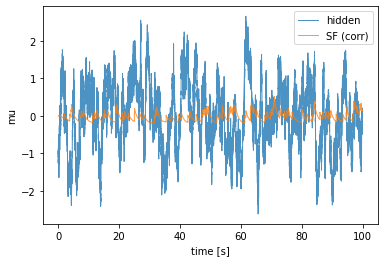

(None, None)

In [43]:
print('tau_ou=1, tau_d=2, beta=1/200, tau_m=2')

vplt(v,p,key='w',dim=0,cut=1,c=None,err=True,alpha=0.8)
vplt(v,p,key='mu',dim=0,cut=1,c=None,err=True,alpha=0.8)
plt.legend(['hidden','SF (corr)'])

plt.show(), plt.close()

In [42]:
np.mean((v['mu'] - v['w'])**2)/np.var(v['w'])

1.0125995163123933